# Excercise 1: A
> Question: 
> Run the code and adjust the number of hidden layers, the number of units in each hidden layer,
alpha (the regularization term, default 0.0001). What do you find? What solution will you
recommend?



In [234]:
#Importing nessecary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import ListedColormap, colorConverter
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Plotting listed colormaps

In [235]:
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [236]:
#Function for plotting 2d seperator to showcase our data and how it is seperated by the neural network

In [237]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


In [238]:
# Function for discrete scatter plot of data points

In [239]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines


In [240]:
# Generate 2d classification dataset

In [241]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

In [242]:
# Scatter plot, dots colored by class value

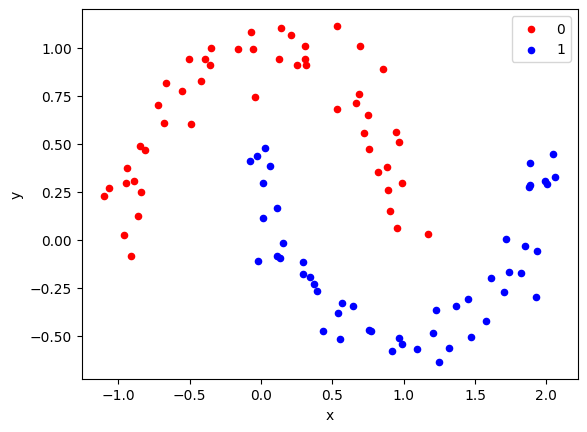

In [243]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [244]:
# Splitting data into training and test sets

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [246]:
# Creating neural network classifier

In [247]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

In [248]:
# Make predictions on the test set

In [249]:
predictions = mlp.predict(X_test)

In [250]:
# Confusion matrix for the predictions made by the neural network

In [251]:
print(confusion_matrix(y_test,predictions))

[[12  0]
 [ 0 13]]


In [252]:
# Classification report for the predictions made by the neural network

In [253]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


In [254]:
# Plotting the decision boundary

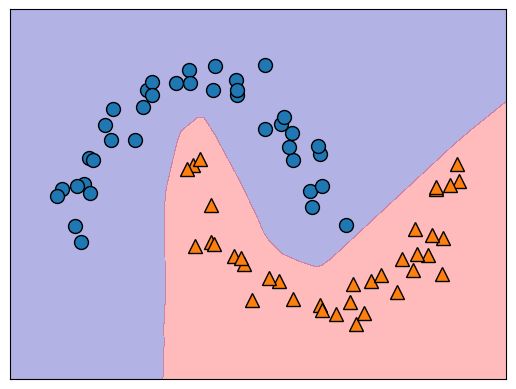

In [255]:
plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
pyplot.show()

In [256]:
# Adjusting values of our neural network

In [257]:
newMlp = MLPClassifier(solver="lbfgs", activation="tanh" ,hidden_layer_sizes=[10,10,10])
newMlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=[10, 10, 10],
              solver='lbfgs')

In [258]:
predictions = newMlp.predict(X_test)

In [259]:
# Confusion matrix for the predictions made by the neural network

In [260]:
print(confusion_matrix(y_test,predictions))

[[12  0]
 [ 0 13]]


In [261]:
# Classification report for the predictions made by the neural network

In [262]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


In [263]:
# Plotting the decision boundary

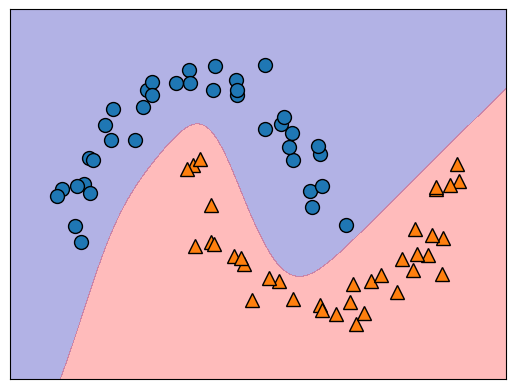

In [264]:
plot_2d_separator(newMlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
pyplot.show()

In [265]:
# What happens if we change the alpha value?

In [266]:
mlpAlpha = MLPClassifier(solver="lbfgs", alpha=1, random_state=0, max_iter=1000).fit(X_train, y_train)

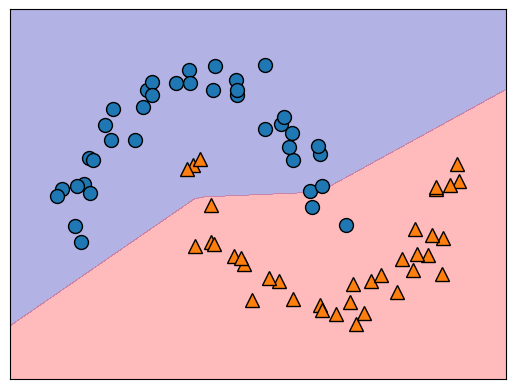

In [267]:
plot_2d_separator(mlpAlpha, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
pyplot.show()

# Conclusion
- My option would be to have a 80-20 split with a NN that uses the tanh activation, 2-3 hidden layers consisting of 10 neurons each. This would give us a good balance between accuracy and speed.
- The tanh activation function is a good choice for this dataset it generates a more smooth decision boundary than the relu activation function.
- Applying regularization to the neural network does not seem to have a big impact on the decision boundary.
- The alpha value seem to have a negative impact on the dataset.